In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
!curl -L -o tmp.zip https://github.com/ultralytics/yolov5/releases/download/v1.0/coco128.zip && unzip -q tmp.zip && rm tmp.zip  # download dataset
%cd yolov5
!pip install -qr requirements.txt  # install dependencies
!pip install pyyaml
!pip install -U tensorboard-plugin-profile
import torch
from IPython.display import Image, clear_output
import os
clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', img_size=416, iou_thres=0.5, output='inference/output', save_txt=False, source='inference/images/', update=False, view_img=False, weights=['yolov5s.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

100% 14.5M/14.5M [00:02<00:00, 7.50MB/s]

Fusing layers... 
Model Summary: 140 layers, 7.45958e+06 parameters, 0 gradients
image 1/2 /content/yolov5/inference/images/bus.jpg: 416x352 3 persons, 1 buss, Done. (0.056s)
image 2/2 /content/yolov5/inference/images/zidane.jpg: 288x416 2 persons, 1 ties, Done. (0.025s)
Results saved to inference/output
Done. (0.482s)


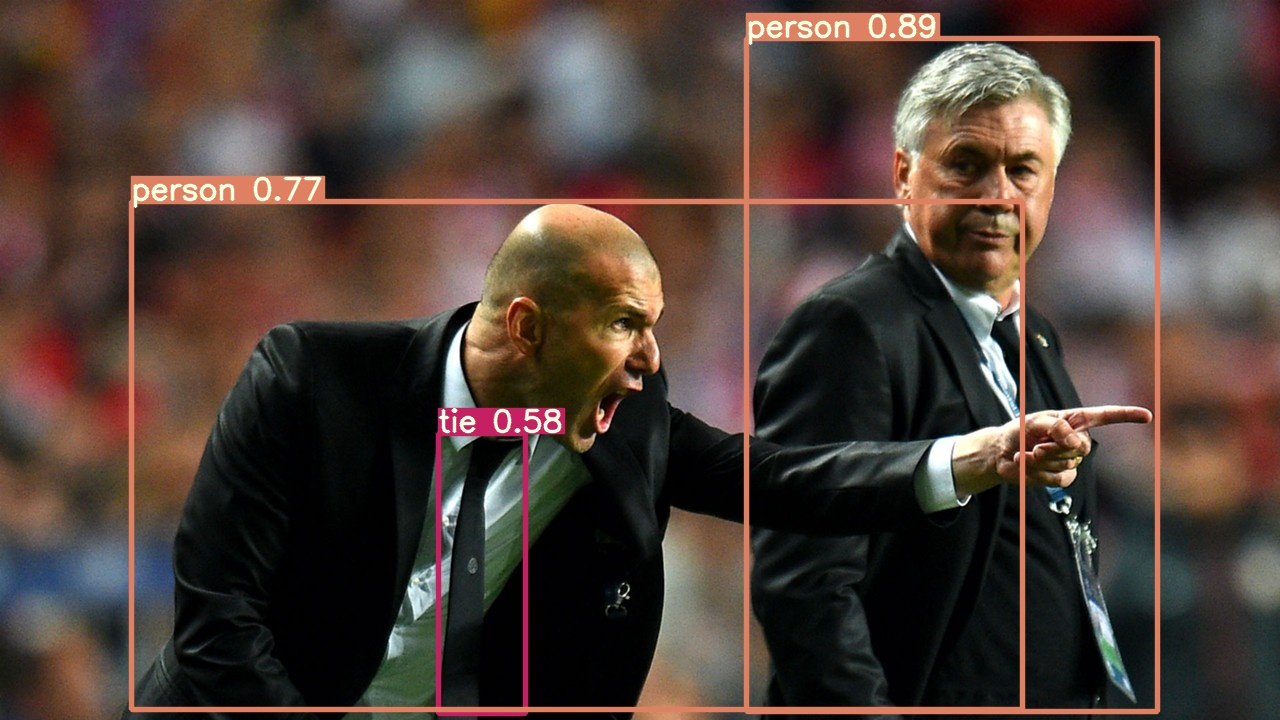

In [ ]:
!python detect.py --weights yolov5s.pt --img 416 --conf 0.4 --source inference/images/
Image(filename='inference/output/zidane.jpg', width=600)

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!rm -rf /content/dhakaAI
os.mkdir('/content/dhakaAI')
%cd /content/dhakaAI
print('copying dataset from drive...')
!cp -r /gdrive/'My Drive'/projects/DhakaAI/dhakaAI_data_cvlab.zip /content/dhakaAI
!unzip dhakaAI_data_cvlab.zip
!rm dhakaAI_data_cvlab.zip
!mv /content/dhakaAI/data /content/dhakaAI/images

In [ ]:
import glob
!rm -rf /content/dhakaAI/labels
os.mkdir('/content/dhakaAI/labels')
os.mkdir('/content/dhakaAI/labels/train')
os.mkdir('/content/dhakaAI/labels/valid')

train_text_list = glob.glob('/content/dhakaAI/images/train/*.txt')
valid_text_list = glob.glob('/content/dhakaAI/images/valid/*.txt')

for txt_file in train_text_list:
    des = os.path.join('/content/dhakaAI/labels/train')
    os.system('mv "{}" "{}"'.format(txt_file,des))
    print('moving', txt_file,'to',des)

for txt_file in valid_text_list:
    des = os.path.join('/content/dhakaAI/labels/valid')
    os.system('mv "{}" "{}"'.format(txt_file,des))
    print('moving', txt_file,'to',des)

clear_output()   

In [ ]:
traffic_names_file = '/content/dhakaAI/traffic.names'
traffic_names=[]
with open(traffic_names_file, 'r') as fp:
    tn = fp.read()
    tn = tn.split('\n')
    for t in tn:
        if t!='':
            traffic_names.append(t)
print(len(traffic_names), traffic_names)
num_classes = 21
train_loc = '../dhakaAI/images/train/'
val_loc = '../dhakaAI/images/valid/'
yaml_path = '/content/yolov5/data/dhakaAI.yaml'

import yaml
dict_file = {'download' : '','train':train_loc, 'val':val_loc, 'nc':num_classes,'names':traffic_names}
with open(yaml_path, 'w+') as file:
    documents = yaml.dump(dict_file, file)

21 ['truck', 'pickup', 'car', 'suv', 'three wheelers (CNG)', 'bus', 'van', 'ambulance', 'rickshaw', 'minivan', 'motorbike', 'bicycle', 'army vehicle', 'human hauler', 'taxi', 'wheelbarrow', 'auto rickshaw', 'minibus', 'scooter', 'policecar', 'garbagevan']


In [ ]:
model_config = '/content/yolov5/models/yolov5s.yaml'
with open(model_config) as f:
    doc = yaml.load(f,Loader=yaml.FullLoader)

doc['nc'] = 21

with open(model_config, 'w+') as f:
    yaml.dump(doc, f)

In [ ]:
%load_ext tensorboard
# %tensorboard --logdir runs

In [ ]:
%cd /content/yolov5

!python train.py --img-size 640 --batch 4 --epochs 2  --data ./data/dhakaAI.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --multi-scale --cache

/content/yolov5
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Namespace(adam=False, batch_size=4, bucket='', cache_images=True, cfg='./models/yolov5s.yaml', data='./data/dhakaAI.yaml', device='', epochs=2, evolve=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], local_rank=-1, logdir='runs/', multi_scale=True, name='', noautoanchor=False, nosave=False, notest=False, rect=False, resume=False, single_cls=False, sync_bn=False, total_batch_size=4, weights='yolov5s.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/", view at http://localhost:6006/
2020-10-13 12:56:46.403420: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Hyperparameters {'lr0': 0.01, 'lrf': 0.2, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'warmup_bias_lr': 0.1, 'box': 0.05, 'cls': 0.5, 'cls_pw': 1.0, '

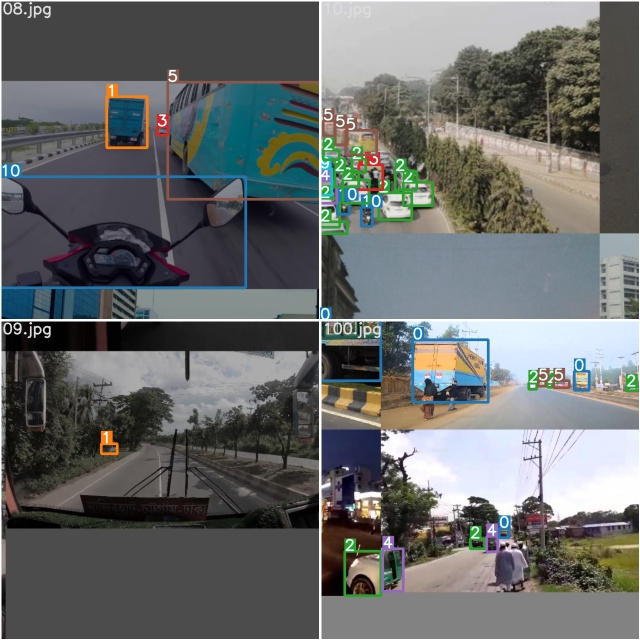

In [ ]:
Image(filename='/content/yolov5/runs/exp1/train_batch1.jpg', width=900)

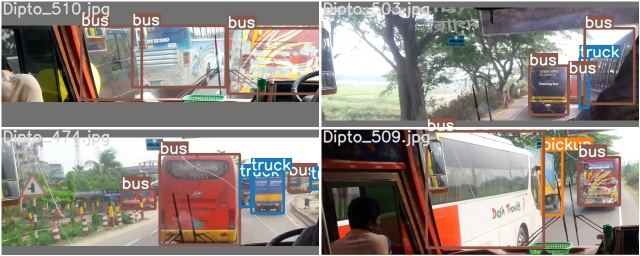

In [ ]:
Image(filename='/content/yolov5/runs/exp1/test_batch0_gt.jpg', width=900)

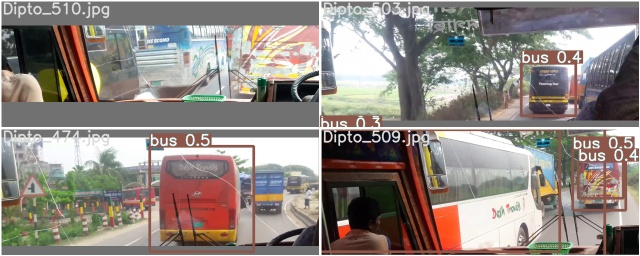

In [ ]:
Image(filename='/content/yolov5/runs/exp1/test_batch0_pred.jpg', width=900)

In [ ]:
%cd /content/yolov5
from utils.general import plot_results; plot_results()

In [ ]:
# !python test.py --weights yolov5x.pt --data coco.yaml --img 672
!python test.py --weights yolov5s.pt --data data/dhakaAI.yaml --img-size 512

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='data/dhakaAI.yaml', device='', img_size=512, iou_thres=0.65, save_json=False, save_txt=False, single_cls=False, task='val', verbose=False, weights=['yolov5s.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Fusing layers... 
Model Summary: 140 layers, 7.45958e+06 parameters, 0 gradients
Scanning labels ../dhakaAI/labels/valid.cache (449 found, 0 missing, 0 empty, 0 duplicate, for 449 images): 449it [00:00, 11850.33it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100% 15/15 [00:24<00:00,  1.62s/it]
                 all         449    4.14e+03      0.0231      0.0779      0.0401      0.0258
Speed: 9.2/5.2/14.5 ms inference/NMS/total per 512x512 image at batch-size 32


In [ ]:
!python test.py --weights /content/yolov5/runs/exp1/weights/best.pt --data data/dhakaAI.yaml --img-size 512

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='data/dhakaAI.yaml', device='', img_size=512, iou_thres=0.65, save_json=False, save_txt=False, single_cls=False, task='val', verbose=False, weights=['/content/yolov5/runs/exp1/weights/best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Fusing layers... 
Model Summary: 140 layers, 7.30046e+06 parameters, 0 gradients
Scanning labels ../dhakaAI/labels/valid.cache (449 found, 0 missing, 0 empty, 0 duplicate, for 449 images): 449it [00:00, 10911.59it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100% 15/15 [00:27<00:00,  1.83s/it]
                 all         449    4.14e+03      0.0465       0.123      0.0659      0.0232
Speed: 8.8/20.5/29.3 ms inference/NMS/total per 512x512 image at batch-size 32


In [ ]:
import argparse
import os
import platform
import shutil
import time
from pathlib import Path

import cv2
import torch
import torch.backends.cudnn as cudnn
from numpy import random

from models.experimental import attempt_load
from utils.datasets import LoadStreams, LoadImages
from utils.general import (
    check_img_size, non_max_suppression, apply_classifier, scale_coords,
    xyxy2xywh, plot_one_box, strip_optimizer, set_logging)
from utils.torch_utils import select_device, load_classifier, time_synchronized


data_config = '/content/yolov5/data/dhakaAI.yaml'
with open(data_config) as f:
    doc = yaml.load(f, Loader=yaml.FullLoader)
names_list = doc['names']
print(names_list)

class opt:
    names= names_list
    weights='/content/yolov5/runs/exp1/weights/best.pt'
    source='/content/dhakaAI/images/test'
    save_txt=True
    output='output'
    classes=False
    img_size= 640
    conf_thres=0.2  #.7
    iou_thres=0.5   #.5
    half=False
    device='0'
    view_img=False
    agnostic_nms=False
    augment=False

['truck', 'pickup', 'car', 'suv', 'three wheelers (CNG)', 'bus', 'van', 'ambulance', 'rickshaw', 'minivan', 'motorbike', 'bicycle', 'army vehicle', 'human hauler', 'taxi', 'wheelbarrow', 'auto rickshaw', 'minibus', 'scooter', 'policecar', 'garbagevan']


In [ ]:
def detect(save_img=False, view_img=False):
    out, source, weights, view_img, save_txt, imgsz, names = \
        opt.output, opt.source, opt.weights, opt.view_img, opt.save_txt, opt.img_size, opt.names
    webcam = False
    save_img = False

    # Initialize
    device = select_device(opt.device)
    if os.path.exists(out):
        shutil.rmtree(out)  # delete output folder
    os.makedirs(out)  # make new output folder
    half = device.type != 'cpu'  # half precision only supported on CUDA

    # Load model
    model = attempt_load(weights, map_location=device)  # load FP32 model
    imgsz = check_img_size(imgsz, s=model.stride.max())  # check img_size
    if half:
        model.half()  # to FP16

    # Second-stage classifier
    classify = False
    if classify:
        modelc = load_classifier(name='resnet101', n=2)  # initialize
        modelc.load_state_dict(torch.load('weights/resnet101.pt', map_location=device)['model'])  # load weights
        modelc.to(device).eval()

    dataset = LoadImages(source, img_size=imgsz)

    # Run inference
    t0 = time.time()
    img = torch.zeros((1, 3, imgsz, imgsz), device=device)  # init img
    _ = model(img.half() if half else img) if device.type != 'cpu' else None  # run once

    results=[]
    print(len(dataset))

    for path, img, im0s, vid_cap in dataset:
        img = torch.from_numpy(img).to(device)
        img = img.half() if half else img.float()  # uint8 to fp16/32
        img /= 255.0  # 0 - 255 to 0.0 - 1.0
        if img.ndimension() == 3:
            img = img.unsqueeze(0)
        # Inference
        t1 = time_synchronized()
        pred = model(img, augment=opt.augment)[0]
        # Apply NMS
        pred = non_max_suppression(pred, opt.conf_thres, opt.iou_thres, classes=opt.classes, agnostic=opt.agnostic_nms)
        t2 = time_synchronized()
        # Apply Classifier
        if classify:
            pred = apply_classifier(pred, modelc, img, im0s)
        img_path_ = str(Path(out) / Path(path).name)
        print('detecting objects in', img_path_)

        # Process detections
        for i, det in enumerate(pred):  # detections per image
            p, s, im0 = path, '', im0s
            save_path = str(Path(out) / Path(p).name)
            txt_path = str(Path(out) / Path(p).stem) + ('_%g' % dataset.frame if dataset.mode == 'video' else '')
            s += '%gx%g ' % img.shape[2:]  # print string
            gn = torch.tensor(im0.shape)[[1, 0, 1, 0]]  # normalization gain whwh
            if det is not None:
                print('=>', len(det),'boxes detected!') 
            else:
                print('X','No box detected!')
            
            if det is not None and len(det):
                # Rescale boxes from img_size to im0 size
                det[:, :4] = scale_coords(img.shape[2:], det[:, :4], im0.shape).round()

                # Print results
                for c in det[:, -1].unique():
                    n = (det[:, -1] == c).sum()  # detections per class
                    s += '%g %ss, ' % (n, names[int(c)])  # add to string

                # Write results
                for *xyxy, conf, cls in det:
                    if save_txt:  # Write to file
                        conf_score = '%.2f' % (conf)
                        label_with_cls = '%s' % (names[int(cls)])                       
                        result = {
                            'image_id': save_path,
                            'score': conf_score,
                            'class': label_with_cls,
                            'xmin': int(xyxy[0]),
                            'ymin': int(xyxy[1]),
                            'xmax': int(xyxy[2]),
                            'ymax': int(xyxy[3]),
                            'width': 1024,
                            'height': 1024
                        }
                        results.append(result)

                        xywh = (xyxy2xywh(torch.tensor(xyxy).view(1, 4)) / gn).view(-1).tolist()  # normalized xywh
                        with open(save_path[:save_path.rfind('.')] + '.txt', 'a') as file:
                            file.write(('%g ' * 5 + '\n') % (cls, *xywh))  # label format
 
                    if save_img or view_img:  # Add bbox to image
                        label = '%s %.2f' % (names[int(cls)], conf)
                        plot_one_box(xyxy, im0, label=label, color=colors[int(cls)])

            # Print time (inference + NMS)
            print('%sDone. (%.3fs)' % (s, t2 - t1))
            print('---------------------------------------------------------------')
            # Stream results
            if view_img:
                cv2.imshow(p, im0)
                if cv2.waitKey(1) == ord('q'):  # q to quit
                    raise StopIteration
 
            # Save results (image with detections)
            if save_img:
                if dataset.mode == 'images':
                    cv2.imwrite(save_path, im0)

    if save_txt or save_img:
        print('Results saved to %s' % os.getcwd() + os.sep + out)
 
    print('Done. (%.3fs)' % (time.time() - t0))
    return results


In [ ]:
with torch.no_grad():
    res=detect()

Fusing layers... 
500
image 1/500 /content/dhakaAI/images/test/Asraf_50_jpg.rf.7026694f0b9f37a6790982295c7e8663.jpg: detecting objects in output/Asraf_50_jpg.rf.7026694f0b9f37a6790982295c7e8663.jpg
=> 4 boxes detected!
---------------------------------------------------------------
640x640 1 trucks, 1 buss, 2 rickshaws, Done. (0.038s)
image 2/500 /content/dhakaAI/images/test/Asraf_51_jpg.rf.0e3516baf7509bc2c4a4aa8deea494c2.jpg: detecting objects in output/Asraf_51_jpg.rf.0e3516baf7509bc2c4a4aa8deea494c2.jpg
=> 4 boxes detected!
---------------------------------------------------------------
640x640 2 cars, 2 rickshaws, Done. (0.037s)
image 3/500 /content/dhakaAI/images/test/Asraf_52_jpg.rf.867869f276e6db3a09a84b99643df316.jpg: detecting objects in output/Asraf_52_jpg.rf.867869f276e6db3a09a84b99643df316.jpg
=> 7 boxes detected!
---------------------------------------------------------------
640x640 1 three wheelers (CNG)s, 3 buss, 3 motorbikes, Done. (0.038s)
image 4/500 /content/dhakaA

In [ ]:
import pandas as pd
import numpy as np

output = pd.DataFrame(res)

In [ ]:
output.head()

,image_id,score,class,xmin,ymin,xmax,ymax,width,height
0,output/Asraf_50_jpg.rf.7026694f0b9f37a67909822...,0.31,rickshaw,253,652,381,910,1024,1024
1,output/Asraf_50_jpg.rf.7026694f0b9f37a67909822...,0.27,truck,760,526,1024,897,1024,1024
2,output/Asraf_50_jpg.rf.7026694f0b9f37a67909822...,0.25,rickshaw,289,671,352,892,1024,1024
3,output/Asraf_50_jpg.rf.7026694f0b9f37a67909822...,0.21,bus,764,512,1024,921,1024,1024
4,output/Asraf_51_jpg.rf.0e3516baf7509bc2c4a4aa8...,0.23,rickshaw,66,688,203,866,1024,1024


In [ ]:
filepath = 'yolov5_13oct_iou_thres_'+str(opt.iou_thres) + '_conf_thres_'+str(opt.conf_thres)+'.csv'
output.to_csv(filepath, index=False)

In [ ]:
!cp -r /content/yolov5/runs/exp1/weights/best.pt '/gdrive/My Drive/yolov3'